<a href="https://colab.research.google.com/github/Srinivas-shinde/CodSoft_IRIS_FLOWER_CLASSIFICATION/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 # Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [3]:
# Importing the dataset
dataset = pd.read_csv('IRIS.csv')

In [4]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
 #Spliting the dataset in independent and dependent variables
X = dataset.iloc[:,:4].values
y = dataset['species'].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [11]:
y_pred = nvclassifier.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor']


In [13]:
y_compare = np.vstack((y_test,y_pred)).T
y_compare[:5,:]

array([['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa']], dtype=object)

In [14]:
 from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]


In [15]:
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))

Correct predictions:  28
False predictions 2


Accuracy of the Naive Bayes Clasification is:  0.9333333333333333


In [19]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [39]:
#loading dataset
iris = pd.read_csv("IRIS.csv")

In [40]:
print("the dataset has {} rows and {} features".format(iris.shape[0],iris.shape[1]))

the dataset has 150 rows and 5 features


In [42]:
table = ff.create_table(iris.head())
py.iplot(table,filename='jupyter-table1')

In [43]:
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [44]:
print(iris.describe())
#py.iplot(ff.create_table(iris.describe()),filename='describe_table')

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [45]:
qd = pd.DataFrame((iris.describe().loc['75%']-iris.describe().loc['25%'])/(iris.describe().loc['75%']+iris.describe().loc['25%']),columns=['COQD'])
print(qd)

                  COQD
sepal_length  0.113043
sepal_width   0.081967
petal_length  0.522388
petal_width   0.714286


In [46]:
print(iris["species"].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


In [48]:
print(" we have {} types of species in this dataset".format(iris.species.nunique()))
print("the names of this species are:",iris.species.unique())

 we have 3 types of species in this dataset
the names of this species are: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


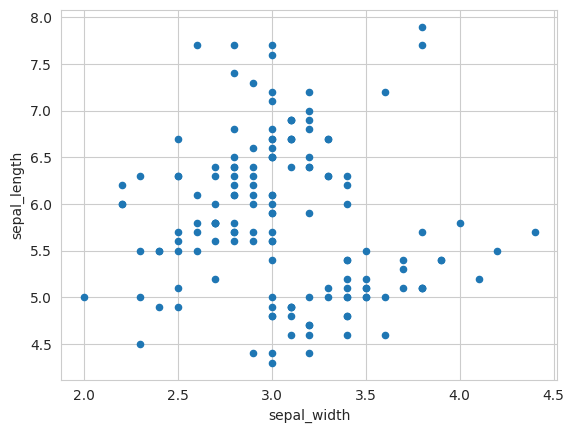

In [55]:
iris.plot(kind='scatter', y='sepal_length', x='sepal_width') ;
plt.show()

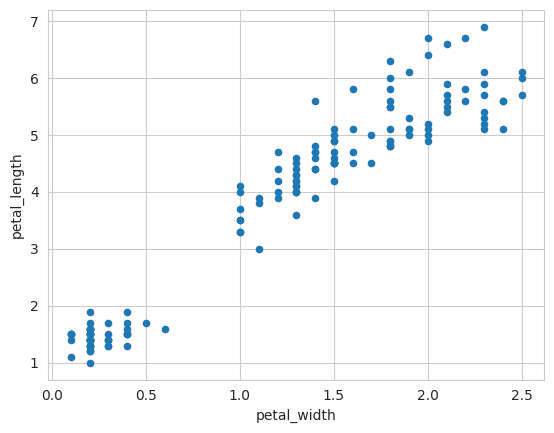

In [56]:
iris.plot(kind='scatter', y='petal_length', x='petal_width') ;
plt.show()

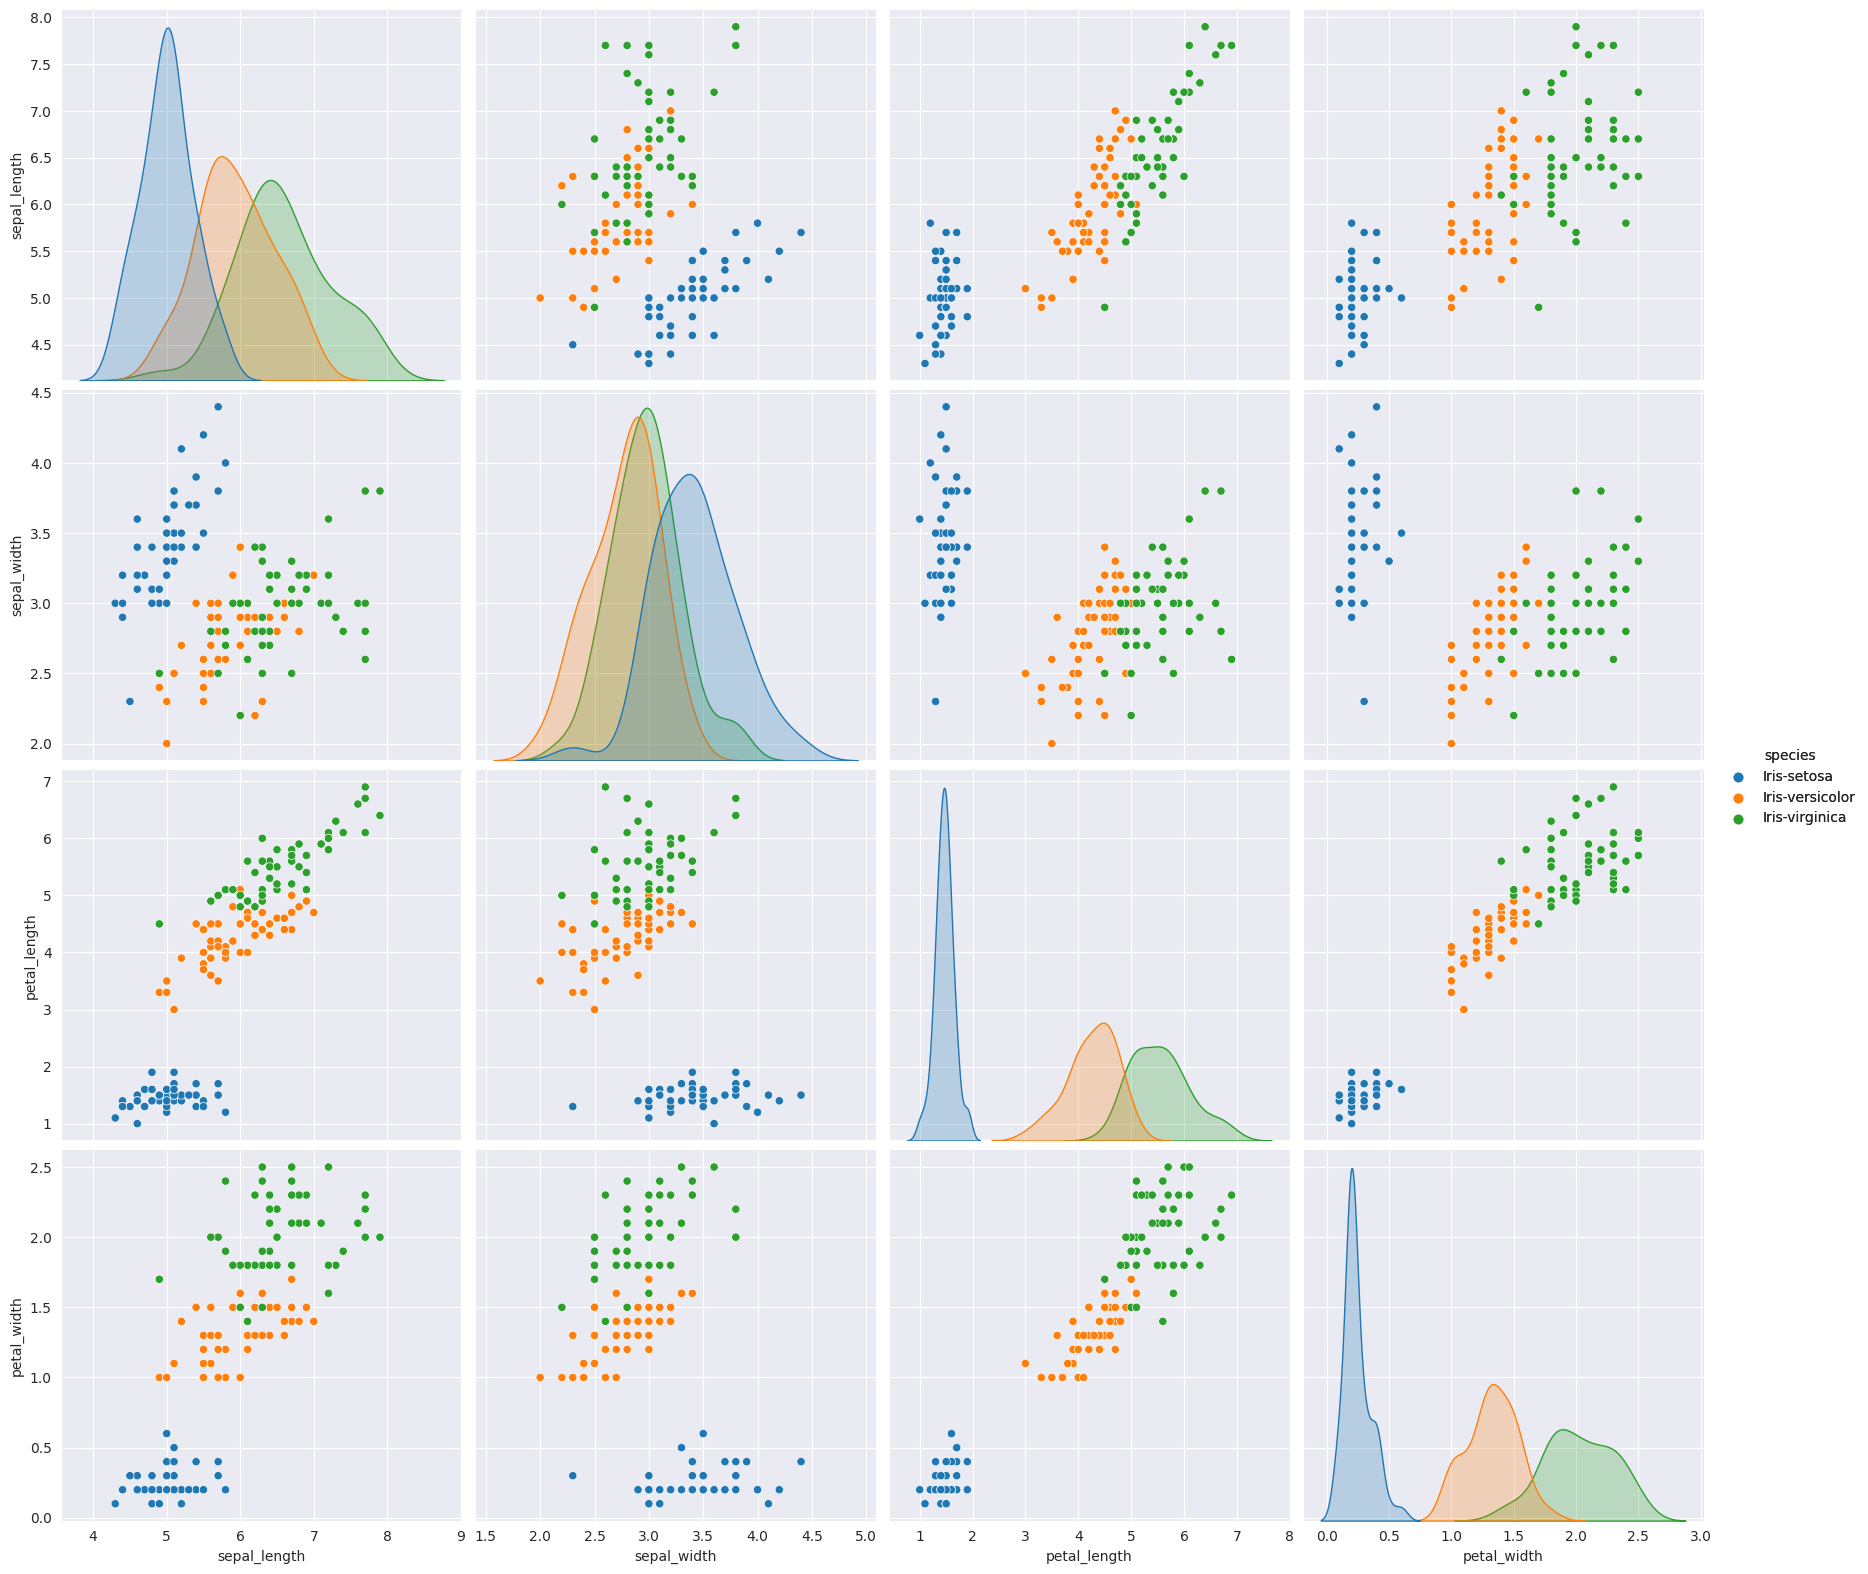

In [59]:
sns.set_style("darkgrid")
sns.pairplot(data=iris,hue="species",size=4)\
   .add_legend()
plt.show()

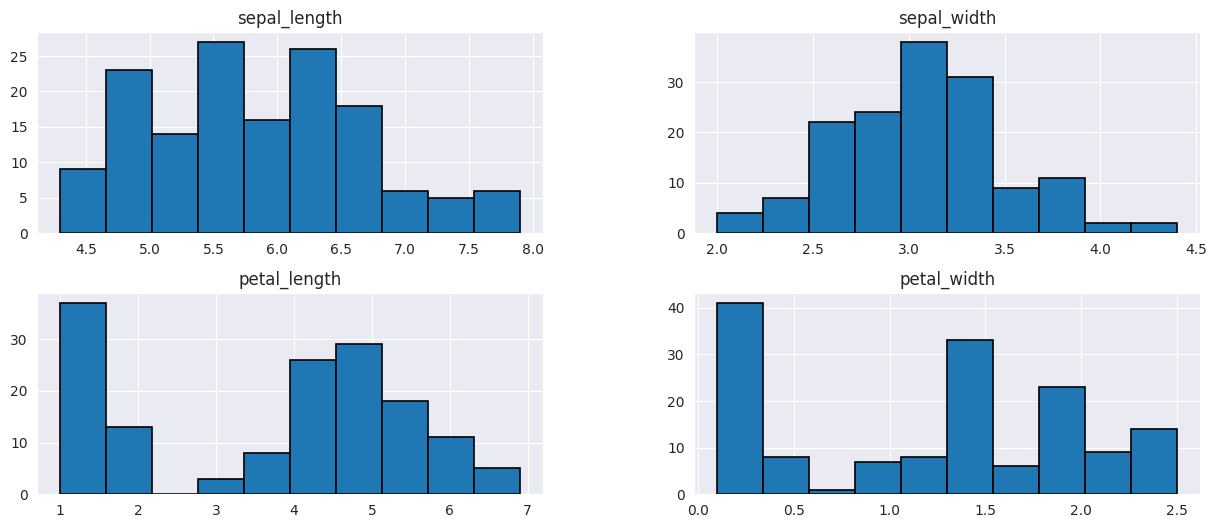

In [65]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(15,6)
plt.show()

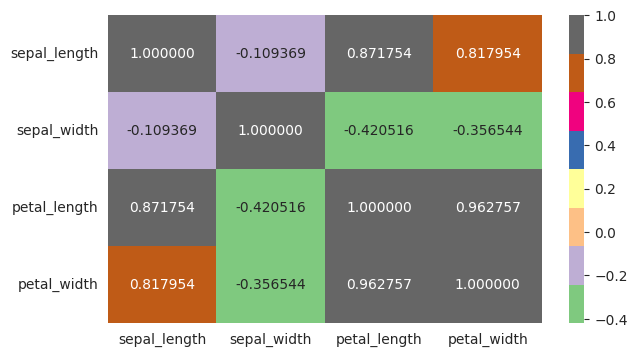

In [94]:
 plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(),annot=True,fmt="f",cmap="Accent")
plt.show()

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


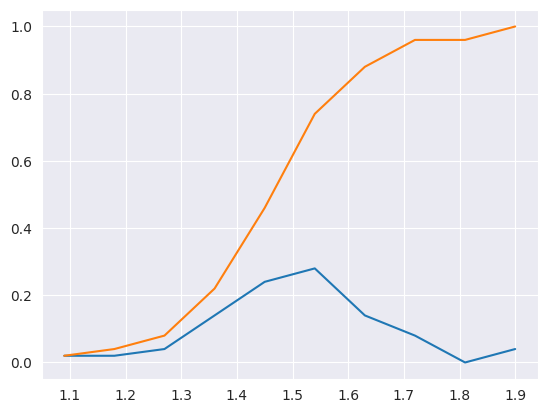

In [72]:
iris_setosa = iris[iris['species']=='Iris-setosa']
print(iris_setosa.head())
counts, bin_edges= np.histogram(iris_setosa['petal_length'],bins=10, density= True)
pdf=counts/(sum(counts))
print(pdf)

print(bin_edges)

cdf=np.cumsum(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
[0.12 0.   0.56 0.14 0.   0.   0.14 0.   0.02 0.02]
[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6 ]
[0.12 0.12 0.68 0.82 0.82 0.82 0.96 0.96 0.98 1.  ]


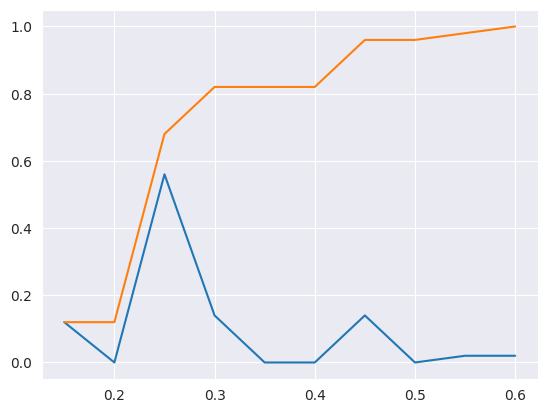

In [73]:
iris_setosa = iris[iris['species']=='Iris-setosa']
print(iris_setosa.head())
counts, bin_edges= np.histogram(iris_setosa['petal_width'],bins=10, density= True)
pdf=counts/(sum(counts))
print(pdf)

print(bin_edges)

cdf=np.cumsum(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

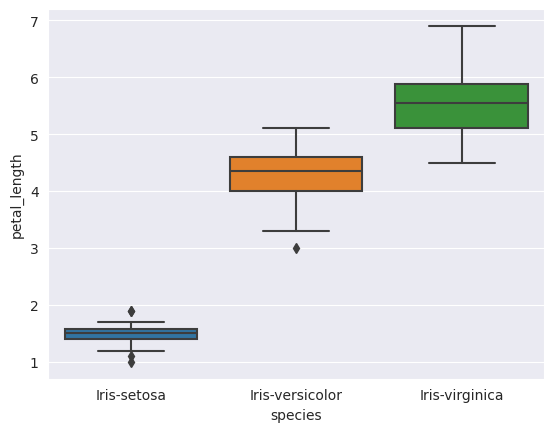

In [74]:
sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

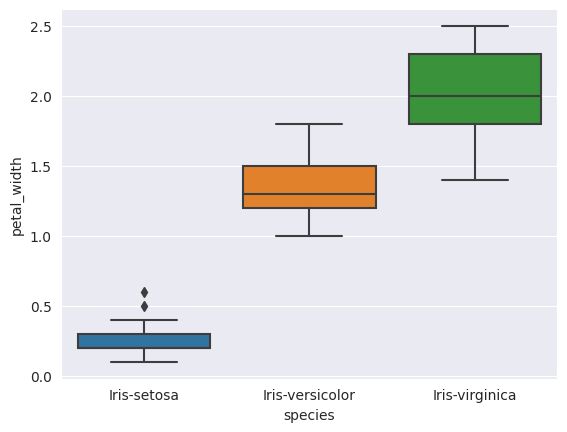

In [75]:
sns.boxplot(x='species',y='petal_width', data=iris)
plt.show()

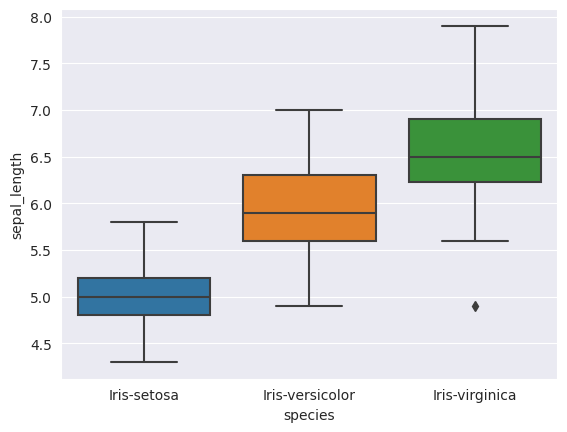

In [76]:
sns.boxplot(x='species',y='sepal_length', data=iris)
plt.show()

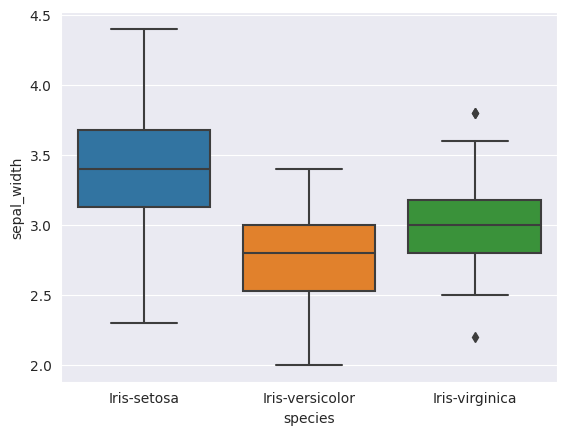

In [77]:
sns.boxplot(x='species',y='sepal_width', data=iris)
plt.show()

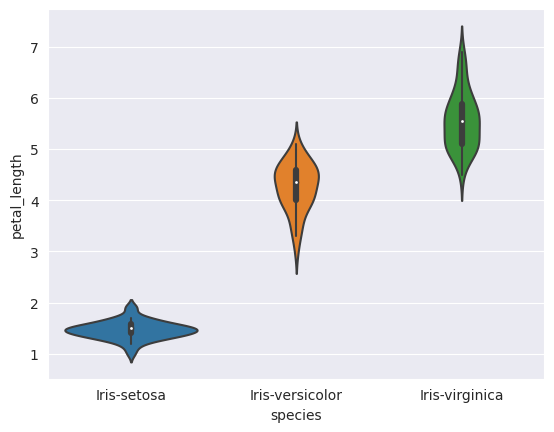

In [78]:
sns.violinplot(x="species", y="petal_length", data=iris, size=8)
plt.show()

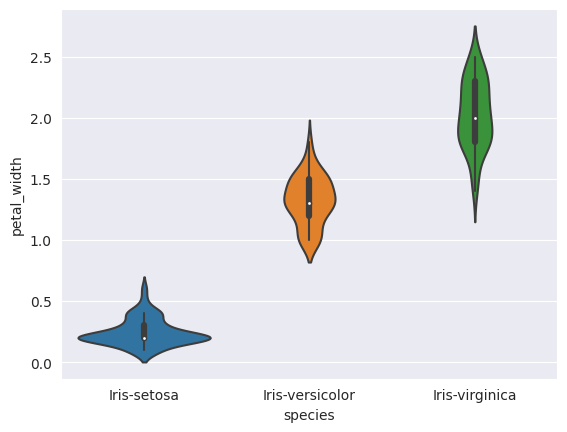

In [79]:
sns.violinplot(x="species", y="petal_width", data=iris, size=8)
plt.show()

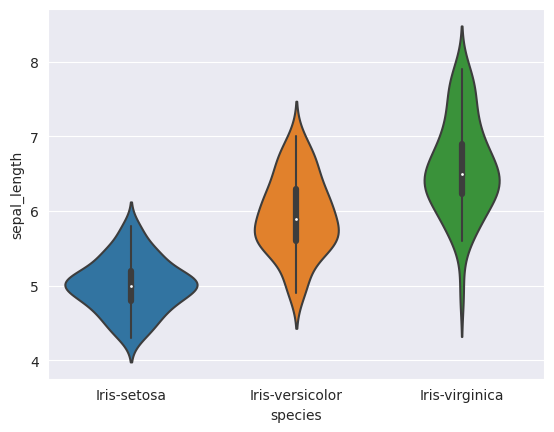

In [80]:
sns.violinplot(x="species", y="sepal_length", data=iris, size=8)
plt.show()

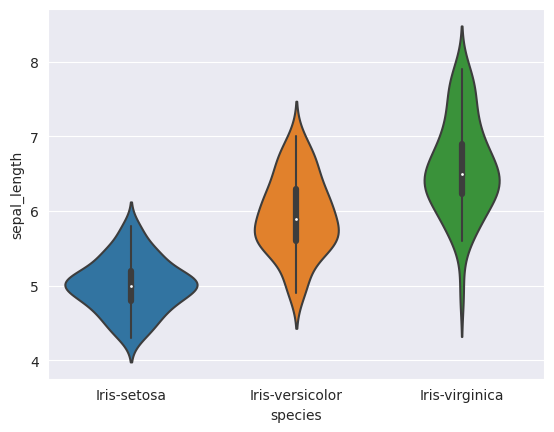

In [81]:
sns.violinplot(x="species", y="sepal_length", data=iris, size=8)
plt.show()

In [82]:
X_train, X_test, y_train,y_test = train_test_split(iris.iloc[:,:4],iris.species,stratify=iris.species,test_size = 0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [83]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
117,7.7,3.8,6.7,2.2
31,5.4,3.4,1.5,0.4
145,6.7,3.0,5.2,2.3
140,6.7,3.1,5.6,2.4
35,5.0,3.2,1.2,0.2


In [84]:
SVC = SVC()
SVC.fit(X_train,y_train)
y_predict = SVC.predict(X_test)
print("the accuracy of the Support Vector Machine Classifier model is :",accuracy_score(y_test,y_predict))
confusion_matrix(y_predict,y_test)

the accuracy of the Support Vector Machine Classifier model is : 0.9333333333333333


array([[15,  0,  0],
       [ 0, 14,  2],
       [ 0,  1, 13]])

In [85]:
LG = LogisticRegression()
LG.fit(X_train,y_train)
y_predict = LG.predict(X_test)
print("the accuracy of the Logistic Regresssion Classifier model is :",accuracy_score(y_predict,y_test))
confusion_matrix(y_predict,y_test)

the accuracy of the Logistic Regresssion Classifier model is : 0.9333333333333333


array([[15,  0,  0],
       [ 0, 14,  2],
       [ 0,  1, 13]])

In [86]:
DTC = DecisionTreeClassifier(max_leaf_nodes = 3)
DTC.fit(X_train,y_train)
y_predict = DTC.predict(X_test)
print("the accuracy of the Decision Tree Classifier model is :",accuracy_score(y_test,y_predict))
confusion_matrix(y_predict,y_test)

the accuracy of the Decision Tree Classifier model is : 0.9333333333333333


array([[15,  0,  0],
       [ 0, 15,  3],
       [ 0,  0, 12]])

In [87]:
ETC=ExtraTreesClassifier()
ETC.fit(X_train,y_train)
ETC_prediction=ETC.predict(X_test)
print('The accuracy of the Extra Trees Classifier model is',accuracy_score(ETC_prediction,y_test))
confusion_matrix(ETC_prediction,y_test)

The accuracy of the Extra Trees Classifier model is 0.9333333333333333


array([[15,  0,  0],
       [ 0, 14,  2],
       [ 0,  1, 13]])

In [88]:
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)
KNN_prediction=KNN.predict(X_test)
print('The accuracy of the KNeighborsClassifier model is',accuracy_score(KNN_prediction,y_test))
confusion_matrix(KNN_prediction,y_test)

The accuracy of the KNeighborsClassifier model is 0.9333333333333333


array([[15,  0,  0],
       [ 0, 14,  2],
       [ 0,  1, 13]])

In [89]:
GNB=GaussianNB()
GNB.fit(X_train,y_train)
GNB_prediction=GNB.predict(X_test)
print('The accuracy of the GaussionNB model is',accuracy_score(GNB_prediction,y_test))
confusion_matrix(GNB_prediction,y_test)

The accuracy of the GaussionNB model is 0.9333333333333333


array([[15,  0,  0],
       [ 0, 15,  3],
       [ 0,  0, 12]])

In [90]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
RFC_prediction=RFC.predict(X_test)
print('The accuracy of the RandomForestClassifier model is',accuracy_score(RFC_prediction,y_test))
confusion_matrix(RFC_prediction,y_test)

The accuracy of the RandomForestClassifier model is 0.9333333333333333


array([[15,  0,  0],
       [ 0, 14,  2],
       [ 0,  1, 13]])